Given the dataset, this project aims to use K- nearest neigbours and decision trees to classify whether a patient has diabetes or not based on the values of the features available.
this is an improvement from the first version
using gridsearchCV and functions to eliminate repetition of activities


The dataset can be found at the following URL:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [3]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

In [4]:
#Reading the csv file as a dataframe
df=pd.read_csv("diabetes.csv")

In [5]:
# Quick check of values from the top and the bottom
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
#Quick statistics for each of the parameters used
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
#Getting information about the type of data entered into each of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
print("The number of features in this dataset is",len(df.columns))
print("They are as follows:")
for i in range(9):
    print(i+1,":",df.columns[i])

The number of features in this dataset is 9
They are as follows:
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


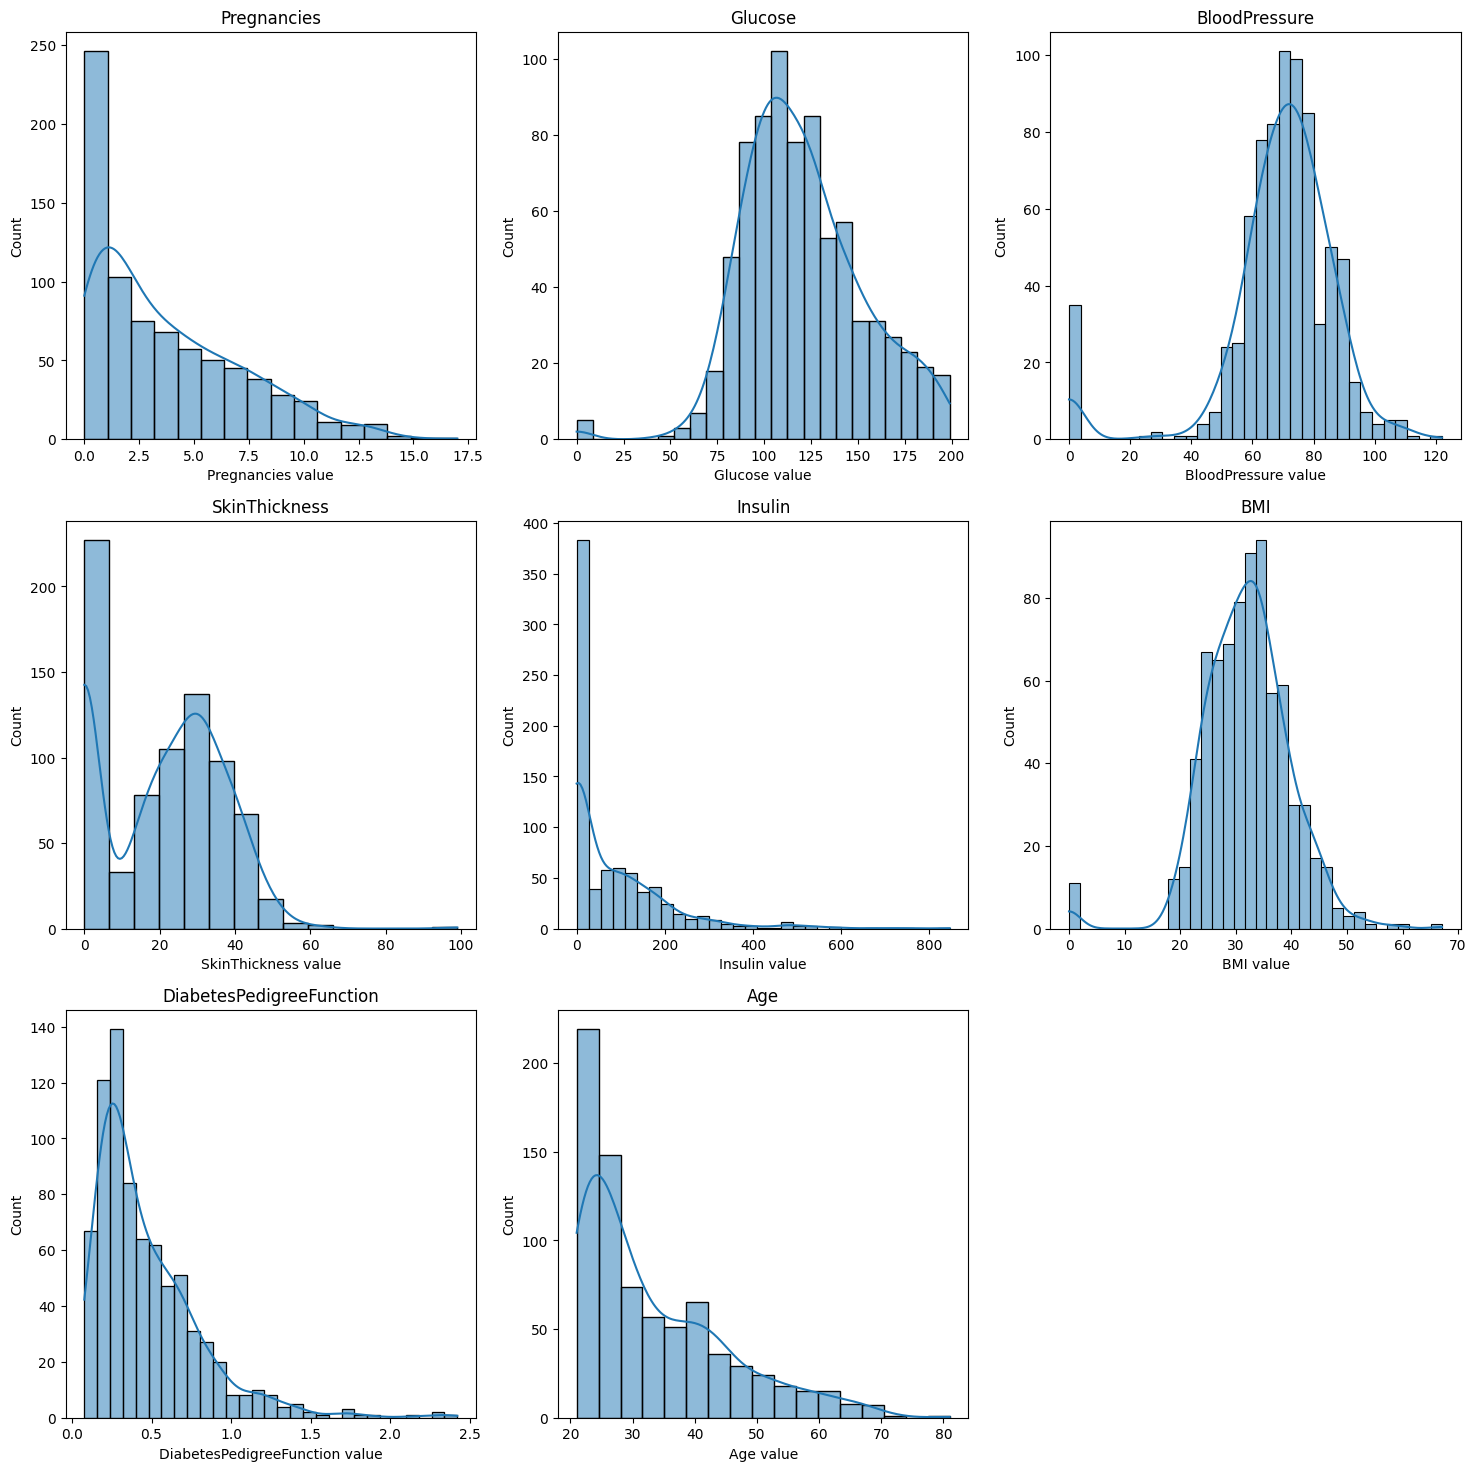

In [11]:
#Employing histograms to visualize the parameters
plt.figure(figsize=(18,18))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.histplot(df[df.columns[i-1]],kde=True).set(title=df.columns[i-1],xlabel=f"{df.columns[i-1]} value",ylabel="Count")
    

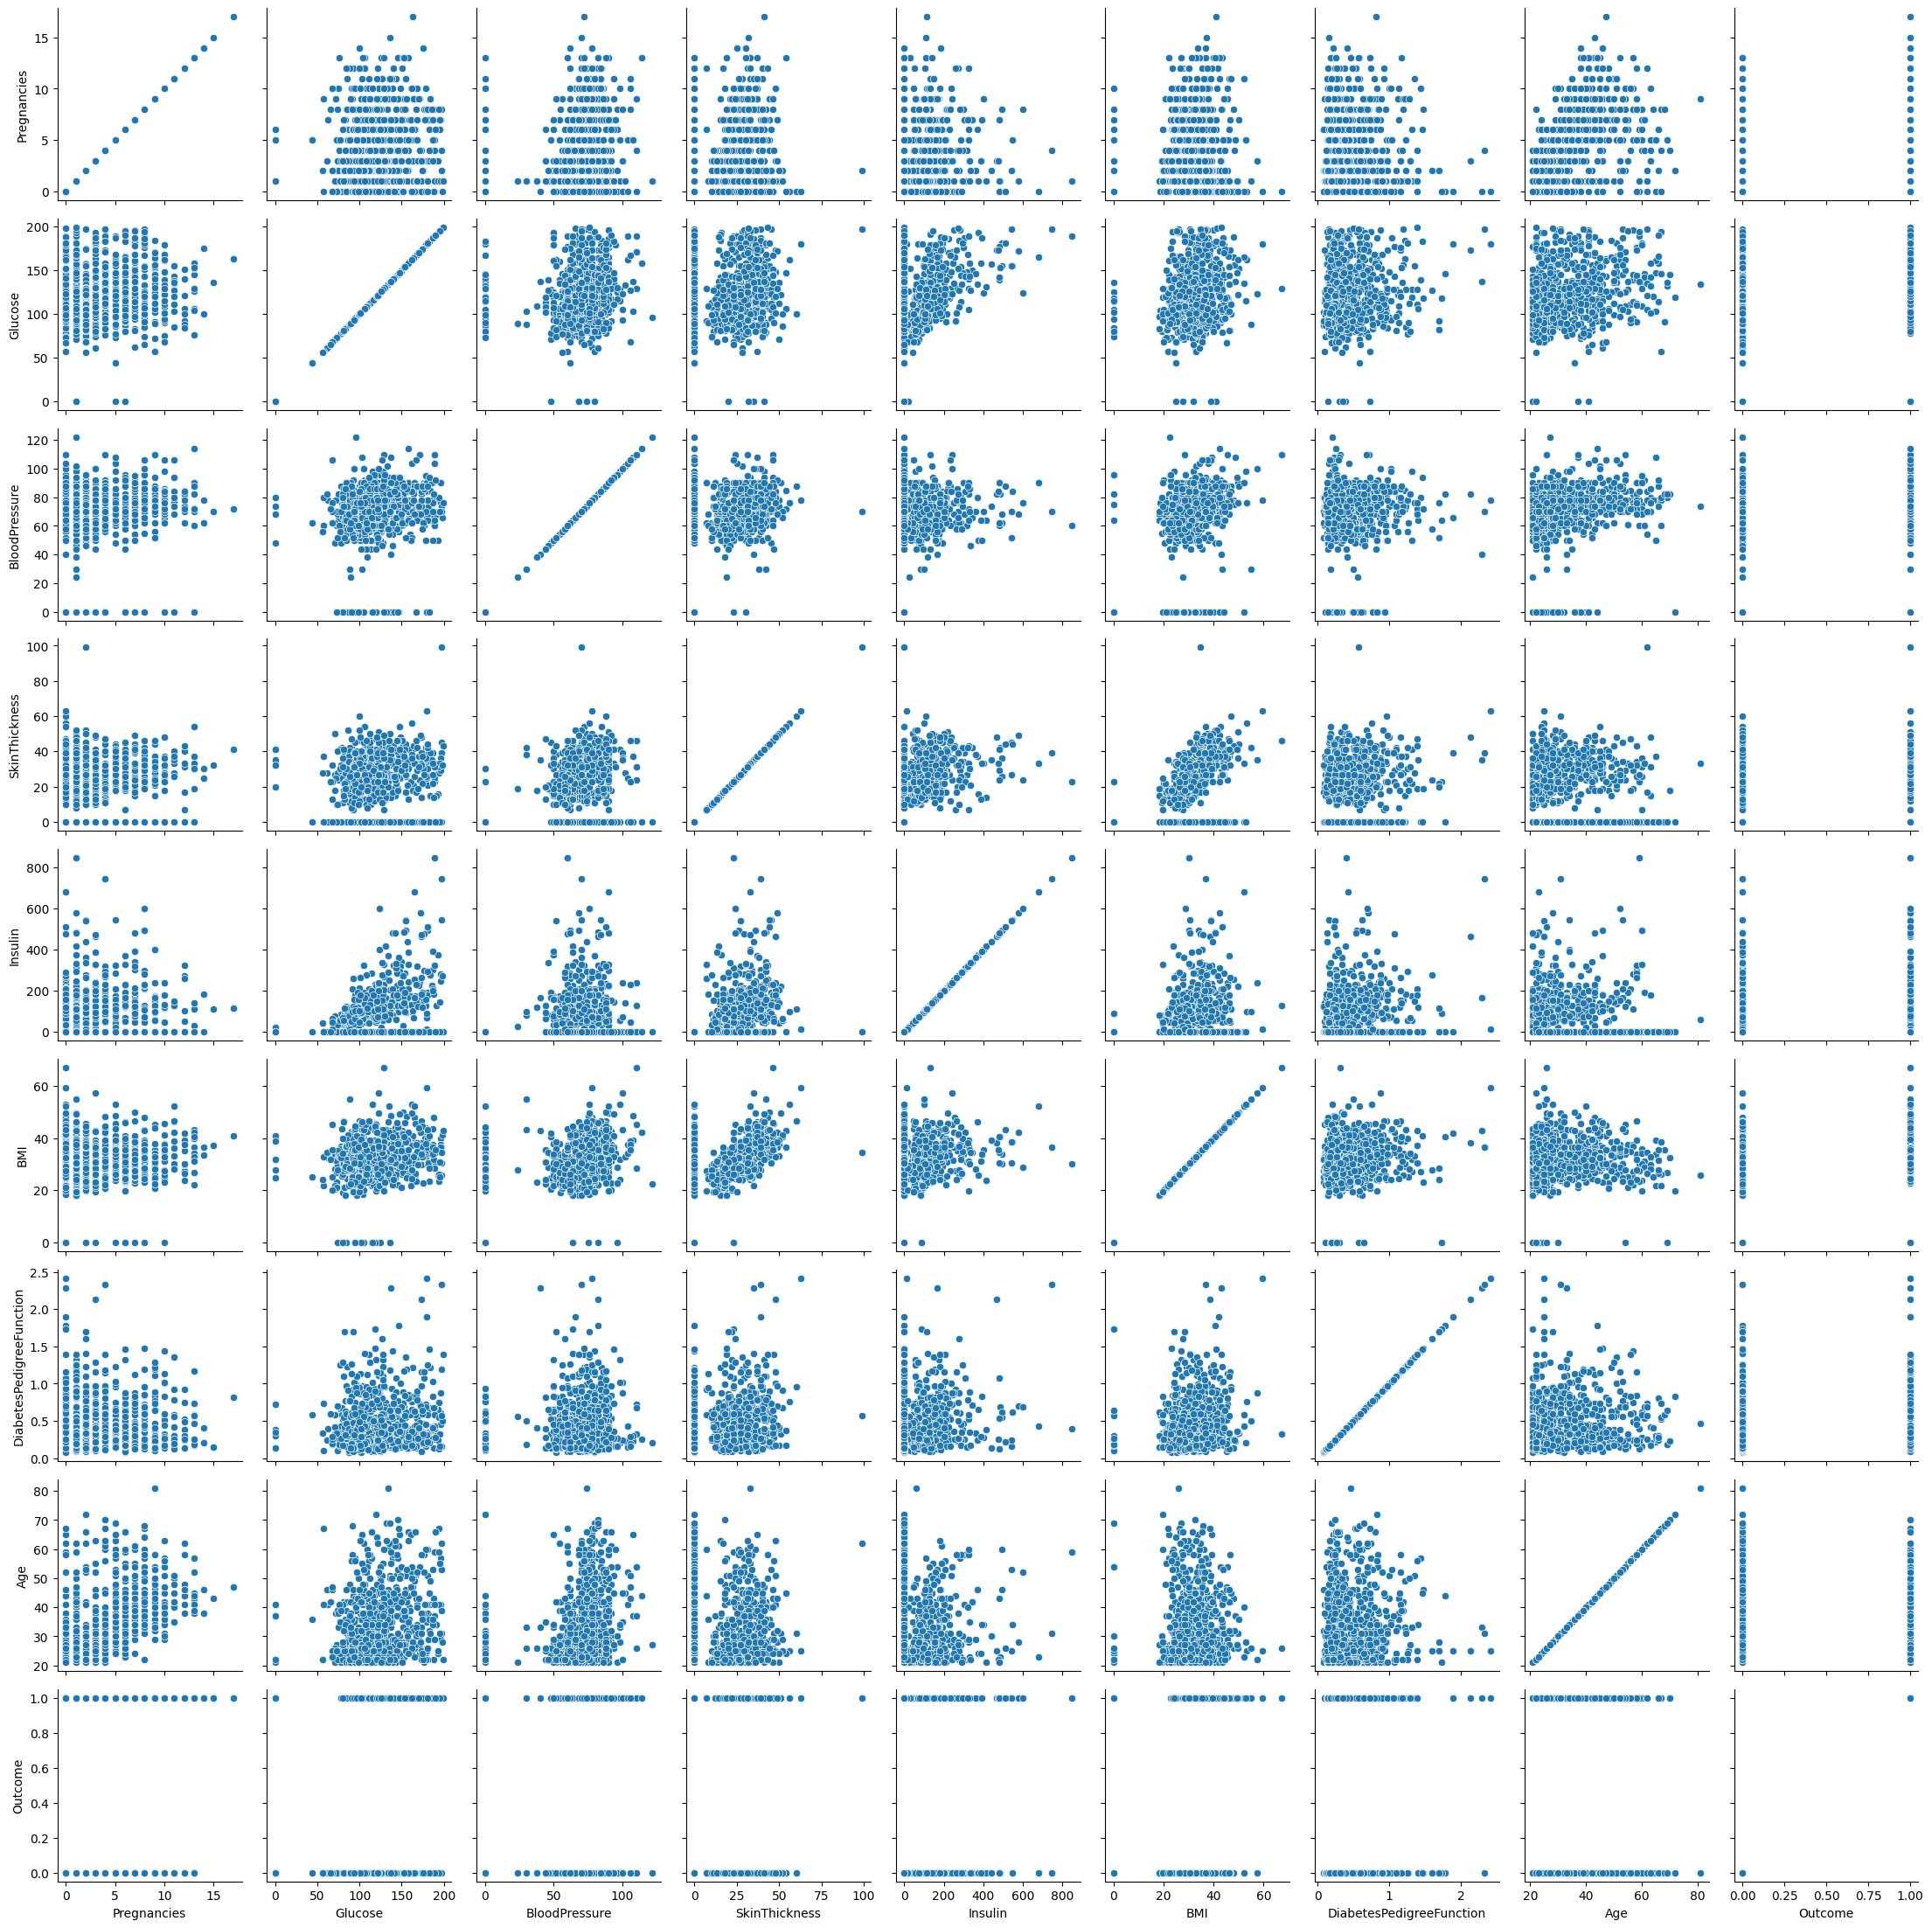

In [12]:
pg=sns.PairGrid(df)
pg.map(sns.scatterplot)

To employ supervised learning techniques,the outputs must be separated from the remaining parameters


With respect to the above sns pairgrid, no observable correlation is found between the variables.
Given the same, the following 2 are adopted:


1.Use the correlation matrix, to check for any relationships between the parameters


2.Semi-supervised learning techniques to cluster the datapoints together.

In the semi-supervised approach, the outcomes against each patient are treated as labels and the remaining parameters are used for the k -means clustering.

[Text(0.5, 1.0, 'Correlation Matrix')]

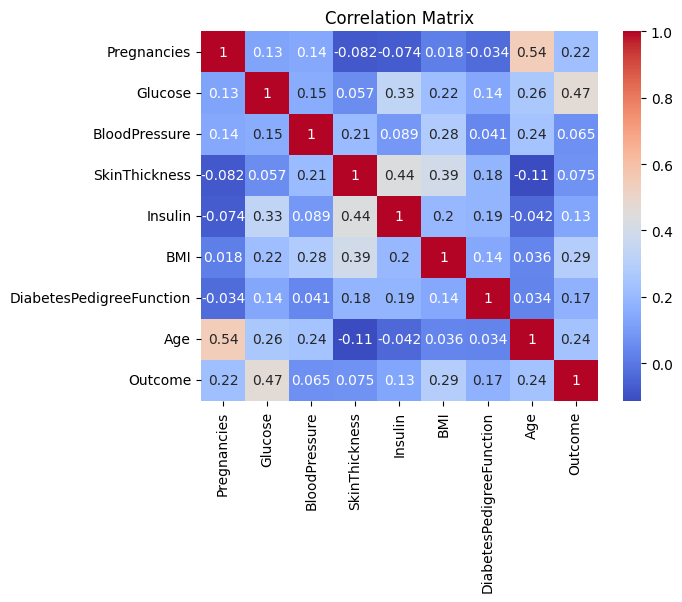

In [13]:
#Displaying the correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='coolwarm').set(title='Correlation Matrix')

In [14]:
#Separating the labels from the original dataframe
y=df["Outcome"]
x=df.drop("Outcome",axis='columns')

#Normalizing the inputs
scaler=StandardScaler()#Instantiating the StandardScaler Object
x=scaler.fit_transform(x)

#For the training and validation, splitting the original dataset in the ratio 80:20
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

print(f'The size of training set is {train_x.shape}')
print(f'The size of test set is {test_x.shape}')
print(f'The size of the original dataset set is {df.shape}')

The size of training set is (614, 8)
The size of test set is (154, 8)
The size of the original dataset set is (768, 9)


# Decision Tree Calculations

Accuracy: 0.75
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



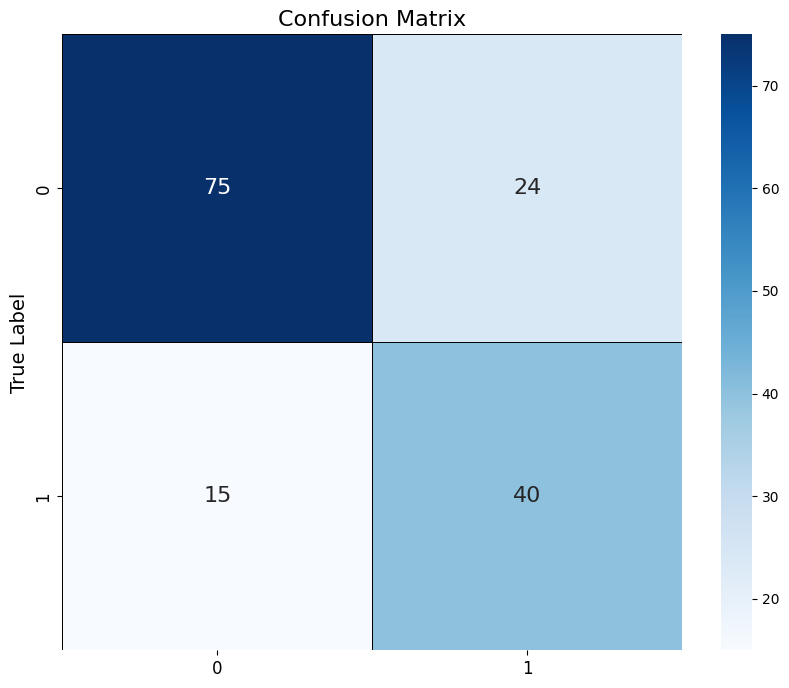

In [15]:

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(train_x,train_y)

# Make predictions on the test data
y_pred = dt.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
class_report = classification_report(test_y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: \n {class_report}")

#Confusion matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16}, linewidths=0.5, linecolor='black')
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Visualize the Decision Tree
plt.figure(figsize=(120, 80))
tree.plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree for Diabetes Prediction")
plt.show()

# KNN Calculations

In [16]:
'''
Function for calculating the accuracy of the model based on K-nearest neigbours
Arguments:
N_NEIGHBORS:Number of nearest neighbors 
trainX:Dataframe that contains input training data
trainY:Dataframe that contains output training data
testX:Dataframe that contains input validation data
testY:Dataframe that contains output validation data
'''
def KNC(N_NEIGHBORS,trainX,trainY,testX,testY):
    #Define dictionaries to store values of accuracy,classification reports per each Distance Norm(L1 to L4 norm)
    accuracy_dict = {key: [] for key in range(1, 5)}
    class_dict={1:[],2:[],3:[],4:[]}
    for k in range(1,N_NEIGHBORS+1):
        #Instantiating the KNeigbors Classifier as per input arguments
        for i in range(1,5):
            accuracy=0
            knn=KNeighborsClassifier(n_neighbors=N_NEIGHBORS,p=i)
            knn.fit(trainX,trainY)
            prediction=knn.predict(testX)
            accuracy=accuracy_score(testY,prediction)
            class_report=classification_report(testY,prediction)
            accuracy_dict[i].append(accuracy*100)
            class_dict[i].append(class_report)

    return accuracy_dict,class_dict


In [17]:
#KNN Evaluation for a sample
KNC(7,train_x,train_y,test_x,test_y)[0].values()

dict_values([[68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884], [68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817], [69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948], [68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817]])

In [18]:
#knn evaluation of the sample properly
acdict,cdict=KNC(7,train_x,train_y,test_x,test_y)
print(acdict)

{1: [68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884, 68.83116883116884], 2: [68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817], 3: [69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948, 69.48051948051948], 4: [68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817, 68.18181818181817]}


In [19]:
def accuracy_plotter(accuracy_dict):
    plt.figure(figsize=(18,18))
    for key, values in accuracy_dict.items():
        x=np.arange(1,len(values)+1,1)
        sns.scatterplot(x=x,y=values,marker='o',label=f'L{key} norm')
    
    plt.title('Accuracy vs number of nearest neigbours')
    plt.xlabel('Number of nearest neighbours')
    plt.ylabel('Accuracy value')
    plt.legend(title='Distance Norm')
    plt.grid(True)
    plt.show()

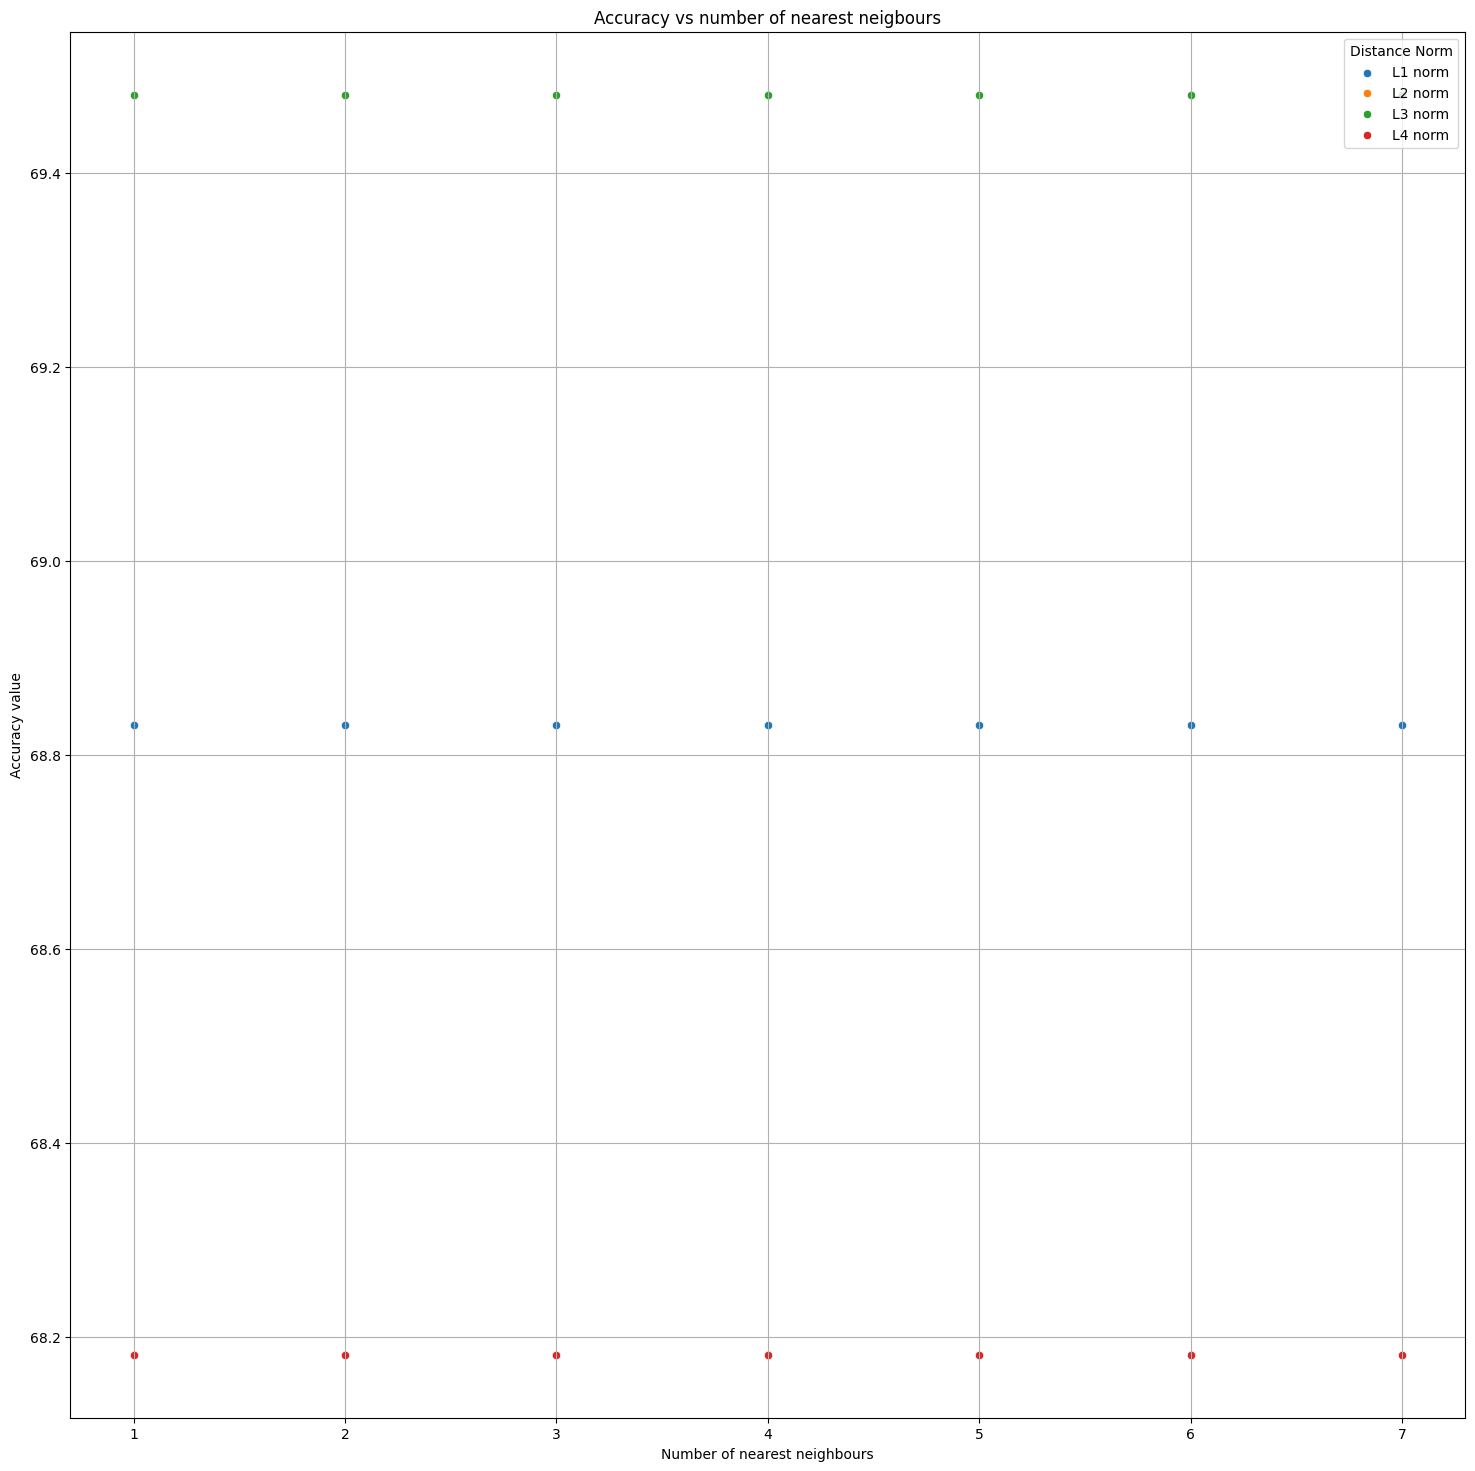

In [20]:
accuracy_plotter(acdict)

In [21]:
acc_dict,class_dict=KNC(201,train_x,train_y,test_x,test_y)

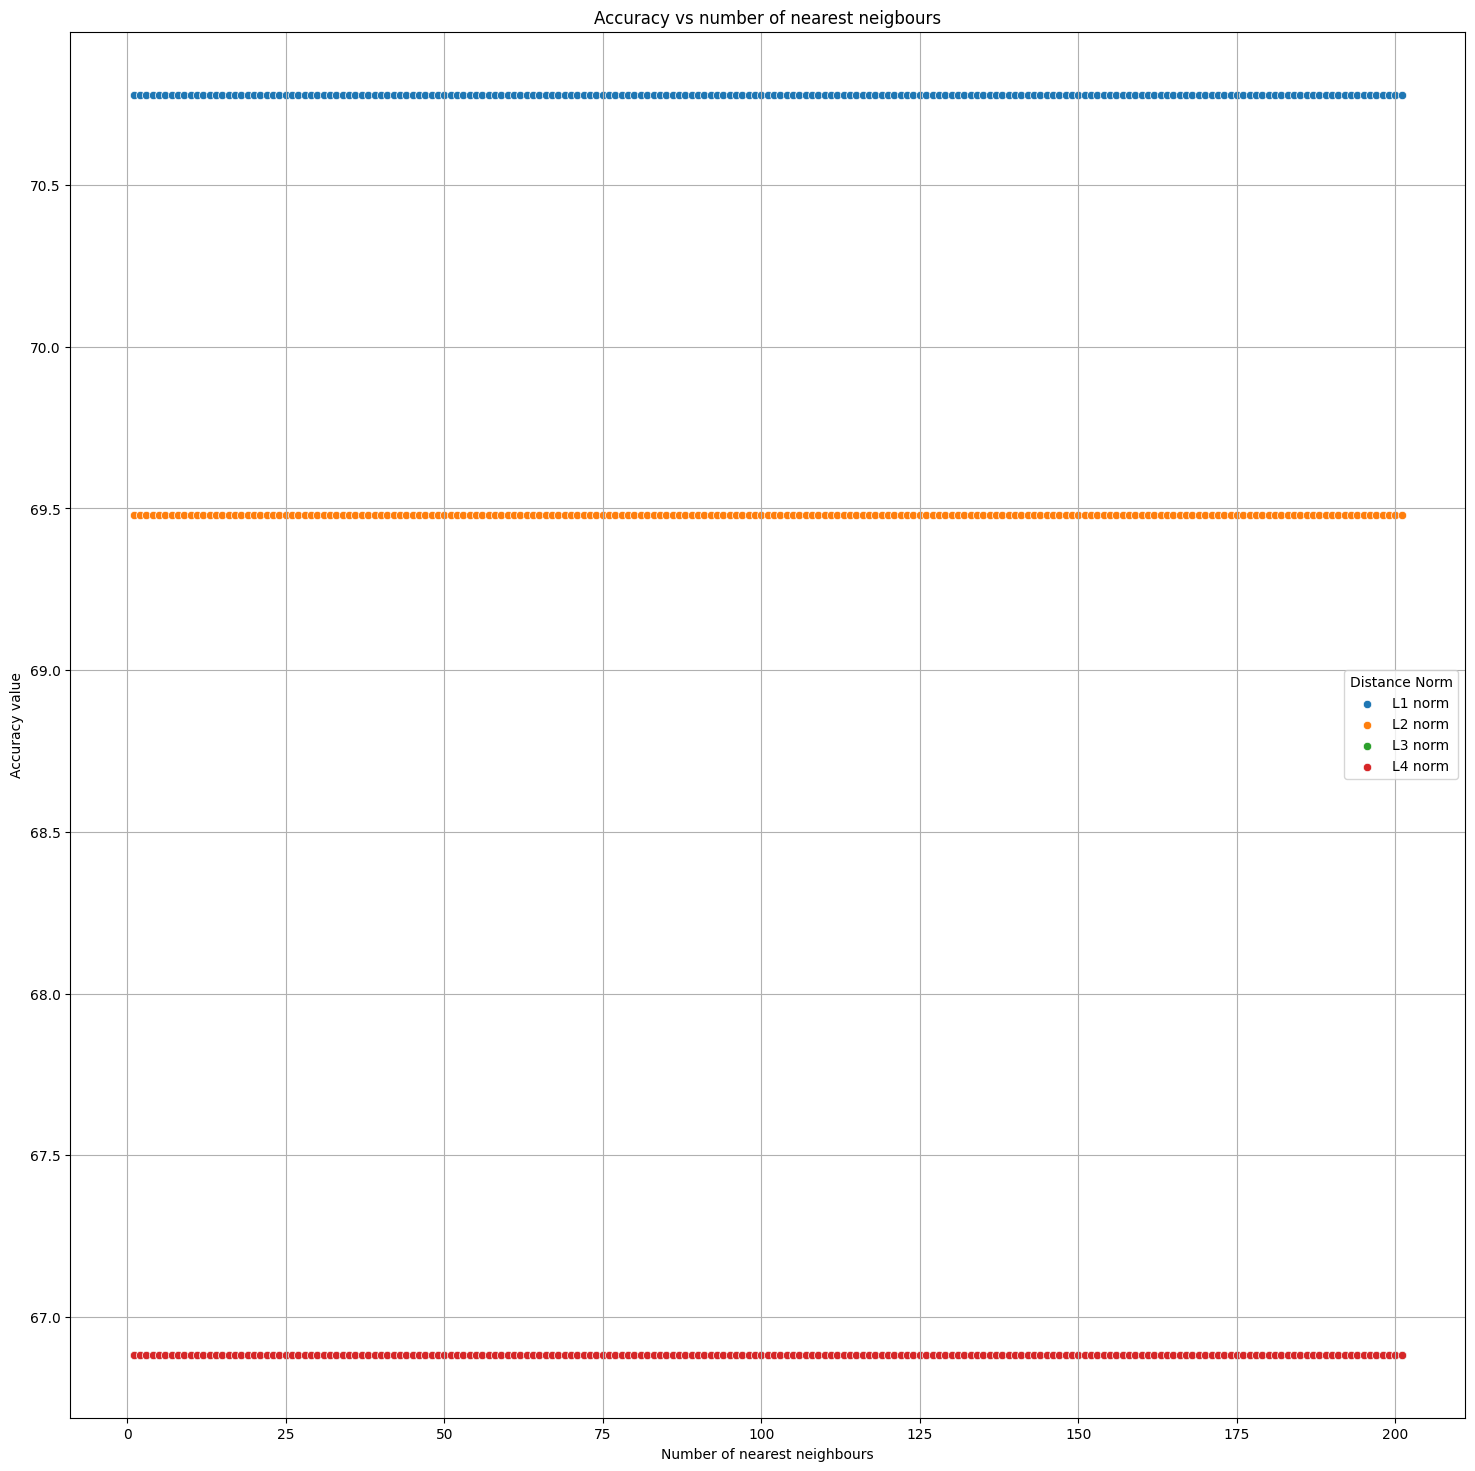

In [22]:
accuracy_plotter(acc_dict)

Using gridsearchcv, we can find the optimized hyperparameters for the best clustering

In [23]:
def knn_hyperparameter_tuning(train_x, train_y):
    param_grid = {
        'n_neighbors': list(range(1, 202, 2)),
        'p': [1, 2, 3, 4],  # L1, L2, L3, and L4 norms
    }
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(train_x, train_y)
    return grid_search.best_params_, grid_search.best_score_

In [24]:
alpha,beta=knn_hyperparameter_tuning(train_x,train_y)

In [25]:
print(f'Optimized parameters for clustering:{alpha}')
print(f'Corresponding Accuracy score: {beta}')

Optimized parameters for clustering:{'n_neighbors': 31, 'p': 1}
Corresponding Accuracy score: 0.7654671464747435
